In [2]:
import torch
from torchvision import transforms
from torchvision import datasets
from ModelToys import CnnModelWithSoftMax
from torch.utils.data import DataLoader
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [3]:
norm_transform = \
    transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# prepare data
train_data = datasets.MNIST("../data/", train=True, transform=norm_transform, download=False)
test_data_xy = datasets.MNIST("../data/", train=False, transform=norm_transform, download=False)
print(len(train_data))
print(train_data[0])
datasize = len(train_data)

60000
(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4

In [4]:
batch_size = 500
train_data_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=4)
test_data_loader = DataLoader(dataset=test_data_xy, shuffle=True, num_workers=0)

In [5]:
# build model
model = CnnModelWithSoftMax()

In [6]:
optim_f = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
loss_f = torch.nn.CrossEntropyLoss(size_average=True)


/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [8]:
epoch = 20
loss_history = []
for i in range(epoch):
    curr_loss = 0
    print(i)
    for idx, data in enumerate(train_data_loader):
        data, target = data
        y_pred = model.forward(data)
        optim_f.zero_grad()
        loss = loss_f(y_pred, target)
        curr_loss = loss.item()
        loss.backward()
        optim_f.step()
        clear_output()
    loss_history.append(curr_loss)



/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <870081F6-12FD-3CEA-BC5C-30F4764F2A98> /Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <F3CB84DE-97C1-34D2-AFB8-54D9DA60ADCD> /Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/luke/

[2.0383687019348145, 1.9043689966201782, 1.8562216758728027, 1.8755866289138794, 1.8208955526351929, 1.8270447254180908, 1.8414543867111206, 1.8375321626663208, 1.8240703344345093, 1.823832631111145, 1.7988483905792236, 1.7854517698287964, 1.807572603225708, 1.815510869026184, 1.7764885425567627, 1.7961156368255615, 1.8003145456314087, 1.7933223247528076, 1.801191806793213, 1.8042711019515991]


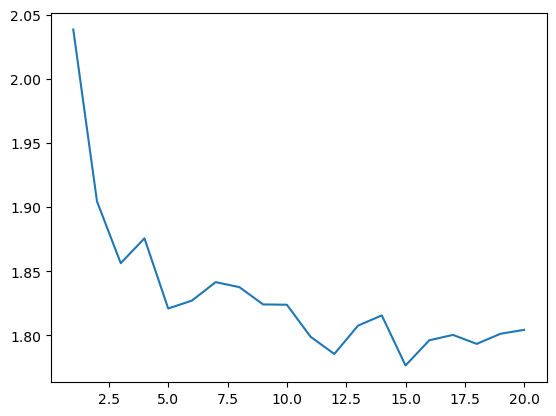

In [9]:
iteration = int(datasize / batch_size)

x = np.linspace(1, epoch, epoch)
print(loss_history)

plt.plot(x, loss_history)


In [ ]:
model.conv1.weight

In [10]:
correct = 0
total = 0

# 不需要计算梯度，可以节省内存和计算资源
with torch.no_grad():
    for inputs, labels in test_data_loader:
        # 计算模型输出
        outputs = model(inputs)

        # 获取预测结果（最大概率对应的类别）
        _, predicted = torch.max(outputs, 1)

        # 更新正确预测的数量和总样本数
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 计算准确率
accuracy = 100 * correct / total
print(f"Test accuracy: {accuracy:.2f}%")

Test accuracy: 67.72%
